# Visualizing Uncertainty

In this notebook, I will plot some basic examples how to visualize uncertainty/variablitiy in a distribution, starting with basic matplotlib examples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
# generate random data
df = pd.DataFrame(columns=['var1', 'var2', 'correlated_var'])

n_datapoints = 200

var1_mean = 3
var1_std = 5

var2_mean = 10
var2_std = 0.5

var1 = np.random.normal(loc = var1_mean, scale = var1_std, size = n_datapoints)
var2 = np.random.normal(loc = var2_mean, scale = var2_std, size = n_datapoints)

weight1 = 0.7
weight2 = 0.3

random_error = np.random.normal(loc = 0, scale = 1, size = n_datapoints)

correlated_var = weight1*var1 + weight2*var2 + random_error

df['var1'] = var1
df['var2'] = var2
df['correlated_var'] = correlated_var

In [3]:
df.head()

,var1,var2,correlated_var
0,-1.055301,9.936759,2.791785
1,7.586882,9.974194,8.045735
2,0.033436,9.888255,3.332479
3,3.601531,10.900040,6.109082
4,3.918417,9.126584,6.324196


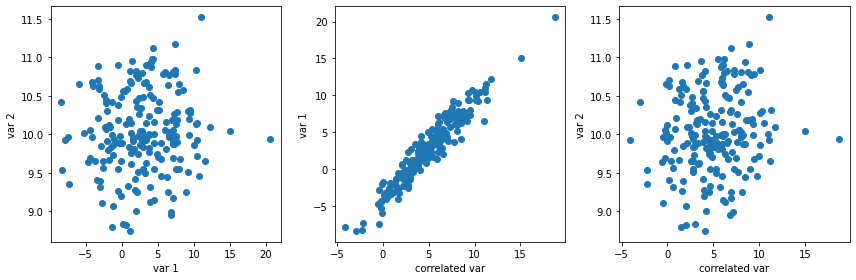

In [4]:
# plot the data points on a scatterplot
scatter_fig, scatter_axs = plt.subplots(1,3, figsize = [12,4])

scatter_axs[0].scatter(df.var1, df.var2)
scatter_axs[0].set_xlabel('var 1')
scatter_axs[0].set_ylabel('var 2')

scatter_axs[1].scatter(df.correlated_var, df.var1)
scatter_axs[1].set_xlabel('correlated var')
scatter_axs[1].set_ylabel('var 1')

scatter_axs[2].scatter(df.correlated_var, df.var2)
scatter_axs[2].set_xlabel('correlated var')
scatter_axs[2].set_ylabel('var 2');

plt.tight_layout()

# Statistics of individual variables
Visualize the distribution of var1, var2, and correlated var ind barplots with different error bars

### 1. Standard Deviation
**On average, a data point is this far away from the mean**

np.std() - square root of the variance, 

defined as: np.sqrt(np.sum((values - np.mean(values)\*\*2)/len(values))

### 2. Variance
**On average, this is the squared distance of a data point from the mean**

np.var() - sum of squared deviations of all data points from the sample mean (or from the model predicition)

defined as: np.sum((values - np.mean(values)\*\*2)/len(values))

### 3. Standard Error
**Based on this sample, if we re-did the study, the mean would vary by this amount**

scipy.stats.sem(sample_data)

The standard error reflects how much variability there is between samples.
As long as the true population data is not known, this measurement is an inferential statistics that can only be estimated.

The standard error is defined as: 

std(full_population_data)/np.sqrt(len(sample_data))

When the full population data is not known (almost always), we can approximate the Standard Error with

std(sample_data)/np.sqrt(len(sample_data))

### 4. Confidence Interval
**Based on this sample, if we re-did the study, the new mean would fall inside this interval in 95% of the cases**

The confidence interval is computed at 1.96 * Standard Error on either side of the mean.

scipy.stats.t.interval(alpha=0.95, df=len(sample_data)-1, loc=np.mean(sample_data), scale=scipy.stats.sem(sample_data)) 

### 5. Max to Min
**This is the full range of values present in the sample**

Laye people often assume that error bars on a plot reflect the full distribution of a sample. We can include error bars that span the full distribution (a bit like boxplots)


### 6. Distribution
**This is how the data points are distributed over the full range of the sample**

Distributions show every single data point (or a representative subset of the datapoints).

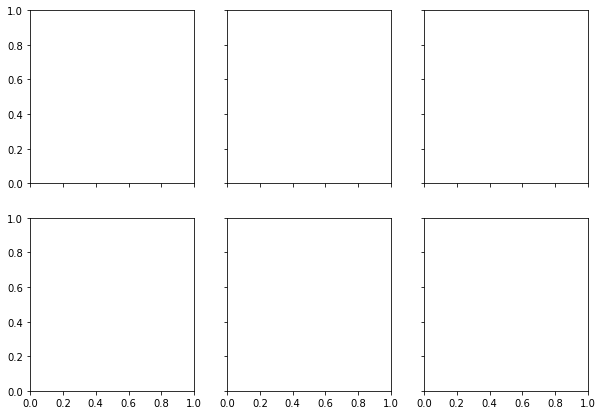

In [5]:
# initialize a full figure
full_fig, full_axs = plt.subplots(2,3, figsize = (10,7), sharex = True, sharey = True);

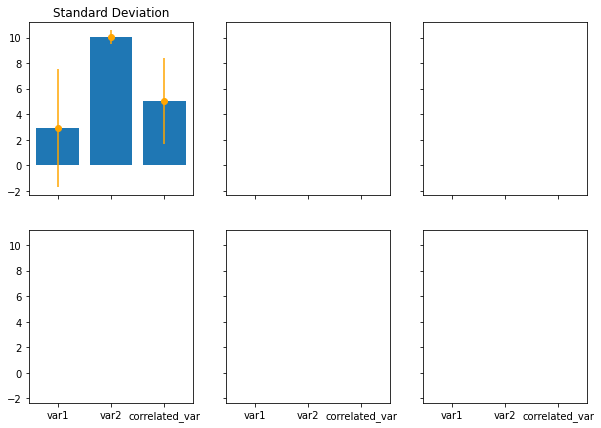

In [6]:
# Standard deviation

std_axs = full_axs[0,0]
mean_values = df.describe().loc['mean'].values
std_values = df.describe().loc['std'].values

std_axs.bar(df.columns, mean_values)
std_axs.errorbar(df.columns, mean_values, yerr = std_values, fmt = 'o', color = 'orange')

std_axs.set_title('Standard Deviation')
full_fig

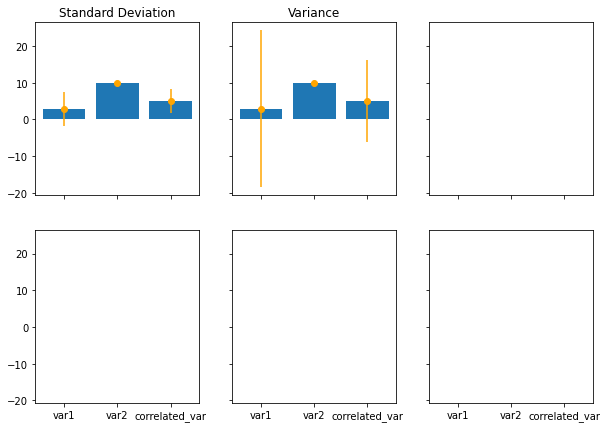

In [7]:
# Variance

var_axs = full_axs[0,1]

var_values = std_values**2
var_axs.bar(df.columns, mean_values)
var_axs.errorbar(df.columns, mean_values, yerr = var_values, fmt = 'o', color = 'orange')

var_axs.set_title('Variance')
full_fig

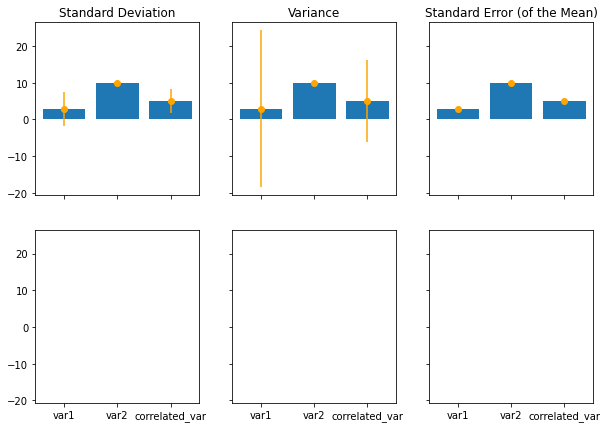

In [8]:
# Standard Error
se_axs = full_axs[0,2]

se_values = [st.sem(df[col]) for col in df.columns]
se_axs.bar(df.columns, mean_values)
se_axs.errorbar(df.columns, mean_values, yerr = se_values, fmt = 'o', color = 'orange')

se_axs.set_title('Standard Error (of the Mean)')
full_fig

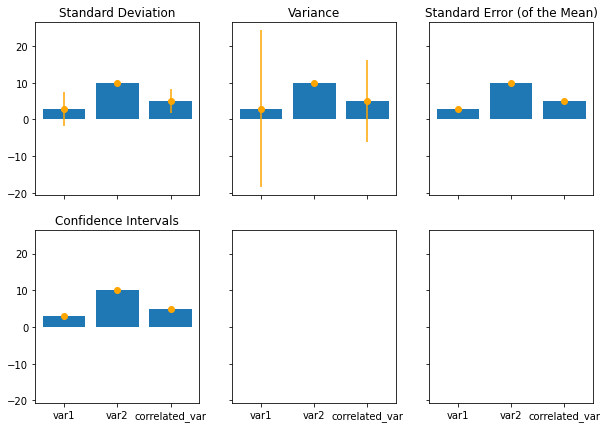

In [9]:
# Confidence Interval
ci_axs = full_axs[1,0]

ci_values = [x*1.96 for x in se_values]
ci_axs.bar(df.columns, mean_values)
ci_axs.errorbar(df.columns, mean_values, yerr = ci_values, fmt = 'o', color = 'orange')

ci_axs.set_title('Confidence Intervals')
full_fig

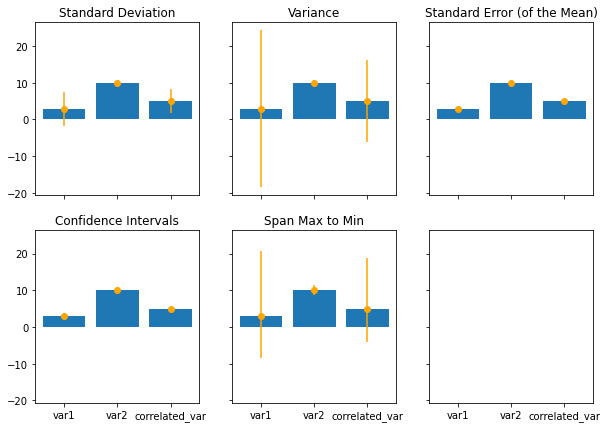

In [10]:
# max to min

max_min_axs = full_axs[1,1]

err_min = [abs(min(df[col]) - np.mean(df[col]))for col in df.columns]
err_max = [abs(max(df[col]) - np.mean(df[col])) for col in df.columns]

max_min_axs.bar(df.columns, mean_values)
max_min_axs.errorbar(df.columns, mean_values, yerr = [err_min, err_max], fmt = 'o', color = 'orange')

max_min_axs.set_title('Span Max to Min')
full_fig

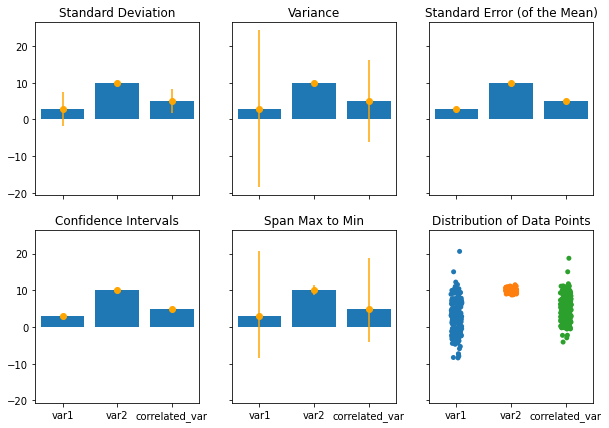

In [11]:
# Distribution plots
distribution_axs = full_axs[1,2]
long_df = df.stack().reset_index()

import seaborn as sns

sns.stripplot(x = 'level_1', y = 0, data = long_df, ax = distribution_axs)
distribution_axs.set_xlabel('')
distribution_axs.set_ylabel('')
distribution_axs.set_title('Distribution of Data Points')
full_fig

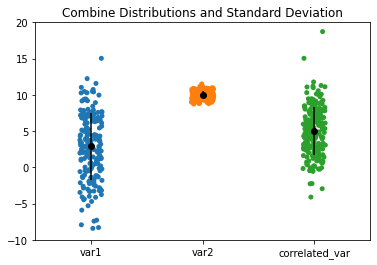

In [12]:
# Overlays
# combining individual data points with summary statistics

combi_axs = plt.subplot()
sns.stripplot(x = 'level_1', y = 0, data = long_df, ax = combi_axs)
combi_axs.errorbar(df.columns, mean_values, yerr = std_values, fmt = 'o', color = 'black', zorder = 10)
combi_axs.set_ylim([-10, 20]);
combi_axs.set_xlim([-0.5, 2.5])
combi_axs.set_xlabel('')
combi_axs.set_ylabel('')
combi_axs.set_title('Combine Distributions and Standard Deviation');

### Put all plots together in one figure

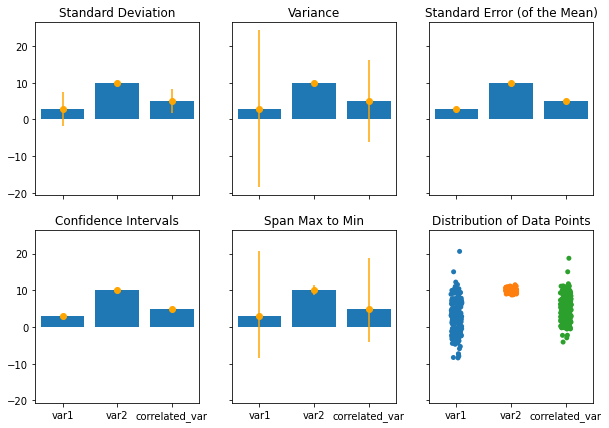

In [14]:
full_fig